In [29]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('matches.csv')
df.head()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2023/24,England,New Zealand,2023/10/05,1,Narendra Modi Stadium,Ahmedabad,New Zealand,field,R Ravindra,HDPK Dharmasena,Nitin Menon,Sharfuddoula,J Srinath,New Zealand,NaN,9.0,Group
1,2023/24,Pakistan,Netherlands,2023/10/06,2,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,Saud Shakeel,AT Holdstock,CM Brown,PR Reiffel,JJ Crowe,Pakistan,81.0,NaN,Group
2,2023/24,Afghanistan,Bangladesh,2023/10/07,3,Himachal Pradesh Cricket Association Stadium,Dharamsala,Bangladesh,field,Mehedi Hasan Miraz,JS Wilson,HDPK Dharmasena,M Erasmus,AJ Pycroft,Bangladesh,NaN,6.0,Group
3,2023/24,South Africa,Sri Lanka,2023/10/07,4,Arun Jaitley Stadium,Delhi,Sri Lanka,field,AK Markram,RK Illingworth,Sharfuddoula,AG Wharf,J Srinath,South Africa,102.0,NaN,Group
4,2023/24,Australia,India,2023/10/08,5,MA Chidambaram Stadium,Chennai,Australia,bat,KL Rahul,CB Gaffaney,RA Kettleborough,AT Holdstock,RB Richardson,India,NaN,6.0,Group


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           48 non-null     object 
 1   team1            48 non-null     object 
 2   team2            48 non-null     object 
 3   date             48 non-null     object 
 4   match_number     48 non-null     int64  
 5   venue            48 non-null     object 
 6   city             48 non-null     object 
 7   toss_winner      48 non-null     object 
 8   toss_decision    48 non-null     object 
 9   player_of_match  48 non-null     object 
 10  umpire1          48 non-null     object 
 11  umpire2          48 non-null     object 
 12  reserve_umpire   47 non-null     object 
 13  match_referee    48 non-null     object 
 14  winner           48 non-null     object 
 15  winner_runs      24 non-null     float64
 16  winner_wickets   24 non-null     float64
 17  match_type       4

In [33]:
df.describe().astype(int)

,match_number,winner_runs,winner_wickets
count,48,24,24
mean,24,125,5
std,14,82,2
min,1,5,1
25%,12,69,5
50%,24,101,6
75%,36,160,7
max,48,309,9


In [34]:
df.isnull().sum()

,0
season,0
team1,0
team2,0
date,0
match_number,0
venue,0
city,0
toss_winner,0
toss_decision,0
player_of_match,0


In [39]:
df['reserve_umpire']=df['reserve_umpire'].fillna('Not Available')
df['winner_runs'] = df['winner_runs'].fillna(df['winner_runs'].mean())
df['winner_wickets']=df['winner_wickets'].fillna(df['winner_wickets'].mean())
df.isnull().sum()

,0
season,0
team1,0
team2,0
date,0
match_number,0
venue,0
city,0
toss_winner,0
toss_decision,0
player_of_match,0


In [63]:
df['winner_runs']=df['winner_runs'].astype(int)
df['winner_wickets']=df['winner_wickets'].astype(int)
df.head()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2023/24,England,New Zealand,2023/10/05,1,Narendra Modi Stadium,Ahmedabad,New Zealand,field,R Ravindra,HDPK Dharmasena,Nitin Menon,Sharfuddoula,J Srinath,New Zealand,0,9,Group
1,2023/24,Pakistan,Netherlands,2023/10/06,2,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,Saud Shakeel,AT Holdstock,CM Brown,PR Reiffel,JJ Crowe,Pakistan,81,0,Group
2,2023/24,Afghanistan,Bangladesh,2023/10/07,3,Himachal Pradesh Cricket Association Stadium,Dharamsala,Bangladesh,field,Mehedi Hasan Miraz,JS Wilson,HDPK Dharmasena,M Erasmus,AJ Pycroft,Bangladesh,0,6,Group
3,2023/24,South Africa,Sri Lanka,2023/10/07,4,Arun Jaitley Stadium,Delhi,Sri Lanka,field,AK Markram,RK Illingworth,Sharfuddoula,AG Wharf,J Srinath,South Africa,102,0,Group
4,2023/24,Australia,India,2023/10/08,5,MA Chidambaram Stadium,Chennai,Australia,bat,KL Rahul,CB Gaffaney,RA Kettleborough,AT Holdstock,RB Richardson,India,0,6,Group


In [40]:
most_wins_counts=df['winner'].value_counts()
most_wins_counts

,count
winner,
India,10
Australia,9
South Africa,7
New Zealand,5
Pakistan,4
Afghanistan,4
England,3
Bangladesh,2
Netherlands,2


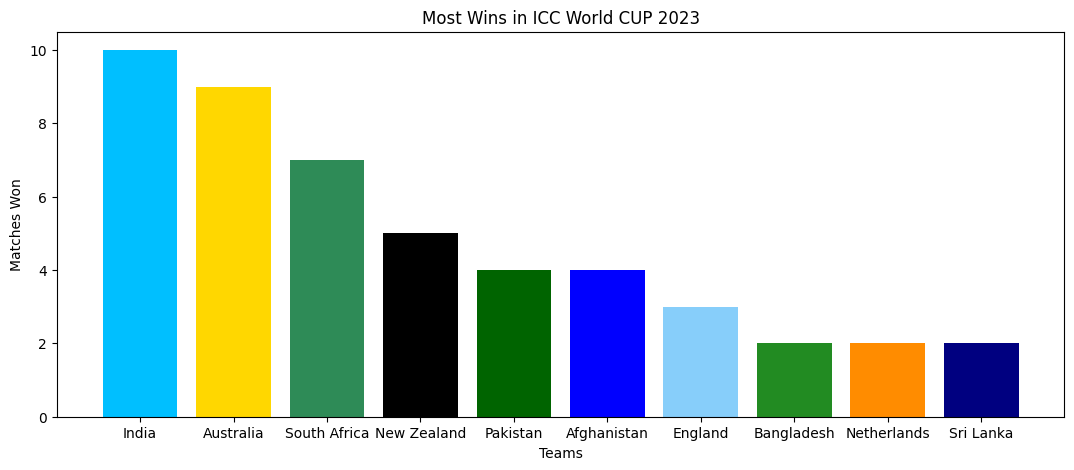

In [48]:
plt.figure(figsize=(13,5))
colors=["deepskyblue","gold","seagreen","black","darkgreen","blue","lightskyblue","forestgreen","darkorange","navy"]
plt.bar(most_wins_counts.index,most_wins_counts.values,color=colors)
plt.xlabel("Teams")
plt.ylabel("Matches Won")
plt.title("Most Wins in ICC World CUP 2023")
plt.show()


In [64]:
df.head()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2023/24,England,New Zealand,2023/10/05,1,Narendra Modi Stadium,Ahmedabad,New Zealand,field,R Ravindra,HDPK Dharmasena,Nitin Menon,Sharfuddoula,J Srinath,New Zealand,0,9,Group
1,2023/24,Pakistan,Netherlands,2023/10/06,2,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,Saud Shakeel,AT Holdstock,CM Brown,PR Reiffel,JJ Crowe,Pakistan,81,0,Group
2,2023/24,Afghanistan,Bangladesh,2023/10/07,3,Himachal Pradesh Cricket Association Stadium,Dharamsala,Bangladesh,field,Mehedi Hasan Miraz,JS Wilson,HDPK Dharmasena,M Erasmus,AJ Pycroft,Bangladesh,0,6,Group
3,2023/24,South Africa,Sri Lanka,2023/10/07,4,Arun Jaitley Stadium,Delhi,Sri Lanka,field,AK Markram,RK Illingworth,Sharfuddoula,AG Wharf,J Srinath,South Africa,102,0,Group
4,2023/24,Australia,India,2023/10/08,5,MA Chidambaram Stadium,Chennai,Australia,bat,KL Rahul,CB Gaffaney,RA Kettleborough,AT Holdstock,RB Richardson,India,0,6,Group


In [68]:
toss_decisions=df.groupby("toss_winner")["toss_decision"].value_counts()

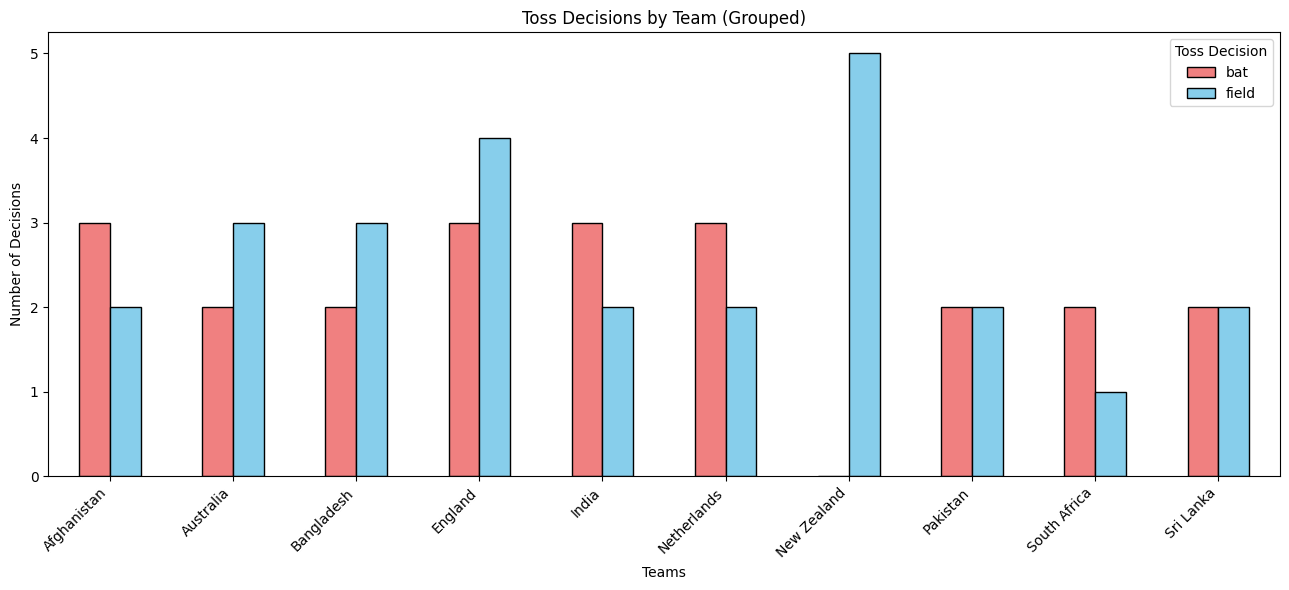

In [84]:
toss_decisions_df = toss_decisions.unstack()

ax = toss_decisions_df.plot(kind='bar', figsize=(13, 6), color=['lightcoral', 'skyblue'], edgecolor='black')

plt.xlabel("Teams")
plt.ylabel("Number of Decisions")
plt.title("Toss Decisions by Team (Grouped)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Toss Decision")
plt.tight_layout()
plt.show()

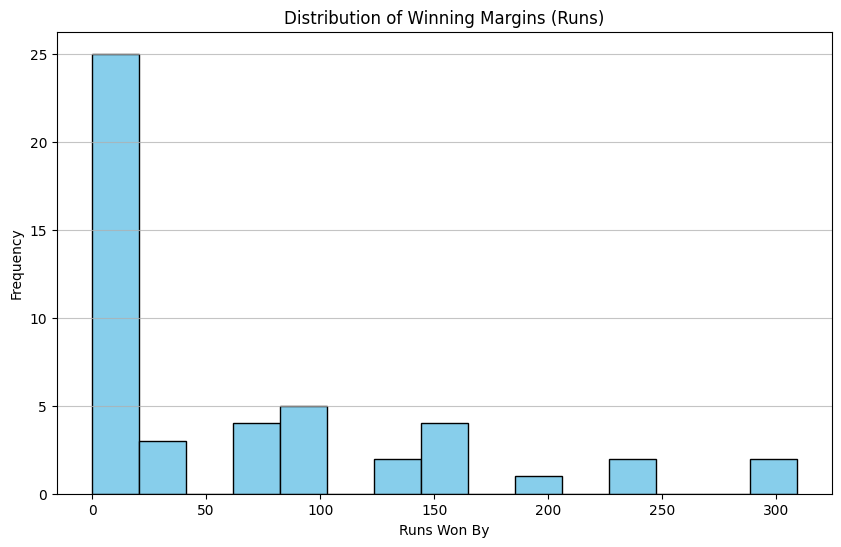

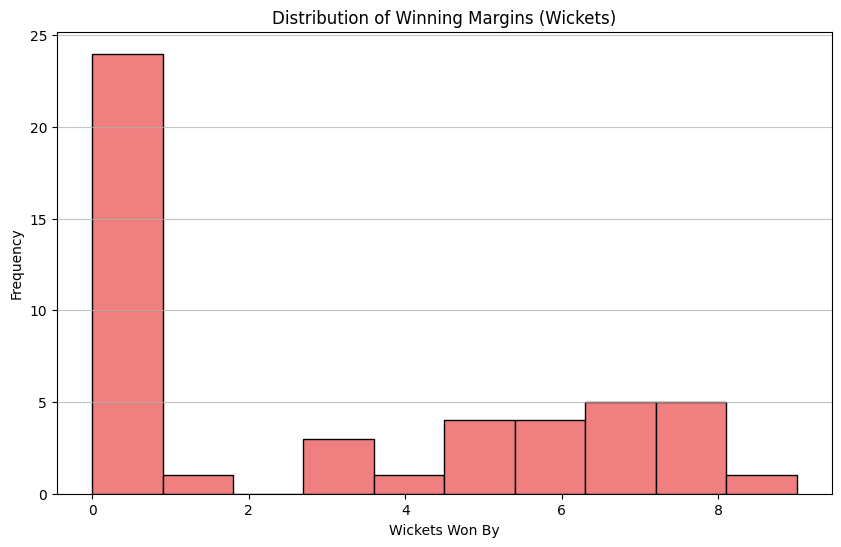

In [79]:
# %%
# Analyze the distribution of winner_runs
plt.figure(figsize=(10, 6))
plt.hist(df['winner_runs'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel("Runs Won By")
plt.ylabel("Frequency")
plt.title("Distribution of Winning Margins (Runs)")
plt.grid(axis='y', alpha=0.75)
plt.show()

# Insight: Most wins by runs appear to be within a certain range.

# %%
# Analyze the distribution of winner_wickets
plt.figure(figsize=(10, 6))
plt.hist(df['winner_wickets'], bins=10, color='lightcoral', edgecolor='black')
plt.xlabel("Wickets Won By")
plt.ylabel("Frequency")
plt.title("Distribution of Winning Margins (Wickets)")
plt.grid(axis='y', alpha=0.75)
plt.show()

# Insight: Wins by wickets are typically won with a significant number of wickets remaining.

In [81]:
df.to_excel("matches_cleaned.xlsx",index=False)